# **1. Perkenalan Dataset**


### Nama Dataset:
Air Quality Dataset (Gas Multisensor Device)

### Sumber Dataset:
Kaggle – Air Quality Dataset

https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set

### Ringkasan Dataset:
Dataset ini berisi data respons dari perangkat gas multisensor yang dipasang di area perkotaan di Italia dengan tingkat polusi yang tinggi. Data dicatat dalam bentuk rata-rata per jam selama periode satu tahun, dari Maret 2004 hingga Februari 2005. Dataset ini mencakup 9.357 observasi yang merepresentasikan respons dari lima sensor kimia berbasis metal oxide, serta pengukuran konsentrasi gas referensi yang diperoleh dari alat analisis bersertifikat.

Variabel yang tersedia mencakup konsentrasi gas seperti Carbon Monoxide (CO), Non-Methanic Hydrocarbons (NMHC), Benzene, Nitrogen Oxides (NOx), dan Nitrogen Dioxide (NO₂), serta kondisi lingkungan seperti suhu, kelembaban relatif, dan kelembaban absolut. Selain itu, dataset ini juga mengandung fenomena cross-sensitivity antar sensor serta sensor drift dan concept drift, yang mencerminkan kondisi nyata pada sistem sensor lingkungan. Nilai yang hilang dalam dataset ditandai dengan nilai -200.

Dataset ini umum digunakan untuk keperluan penelitian, khususnya dalam pengembangan dan evaluasi model machine learning untuk tugas regresi dan analisis kualitas udara.

### Informasi Atribut (Ringkas)
Dataset ini terdiri dari 15 atribut utama, antara lain:
- Tanggal dan waktu pengambilan data
- Konsentrasi gas referensi (CO, NMHC, Benzene, NOx, NO₂)
- Respons sensor gas berbasis metal oxide (PT08.S1–PT08.S5)
- Variabel lingkungan (suhu, kelembaban relatif, dan kelembaban absolut)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [5]:
#Type your code here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
df = pd.read_csv("../data/air_quality/airquality.csv", sep=';', decimal=',', header=0)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [8]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Dataset Air Quality memiliki 9.471 data observasi dengan 17 fitur.  
Sebagian besar fitur bertipe numerik (`float64`) yang merepresentasikan sensor kualitas udara.

Terdapat dua fitur bertipe objek, yaitu `Date` dan `Time`, yang menunjukkan bahwa dataset memiliki karakteristik **time-series**.

Selain itu, ditemukan dua kolom (`Unnamed: 15` dan `Unnamed: 16`) yang seluruh nilainya kosong, sehingga kolom tersebut tidak memiliki informasi yang relevan untuk analisis dan perlu dihapus.


In [9]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [10]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

Berdasarkan hasil pengecekan missing value, ditemukan bahwa hampir seluruh fitur
mengalami 114 nilai kosong yang konsisten pada baris yang sama.
Hal ini mengindikasikan adanya kegagalan pencatatan data pada waktu tertentu.

Selain itu, kolom Unnamed: 15 dan Unnamed: 16 tidak memiliki nilai sama sekali
sehingga dihapus dari dataset.

In [11]:
df.duplicated().sum()

np.int64(113)

In [12]:
df_numeric = df.select_dtypes(include='float64')

df_numeric.hist(figsize=(14,10))
plt.suptitle("Distribusi Fitur Sensor")
plt.show()

ModuleNotFoundError: No module named 'IPython.core.pylabtools'

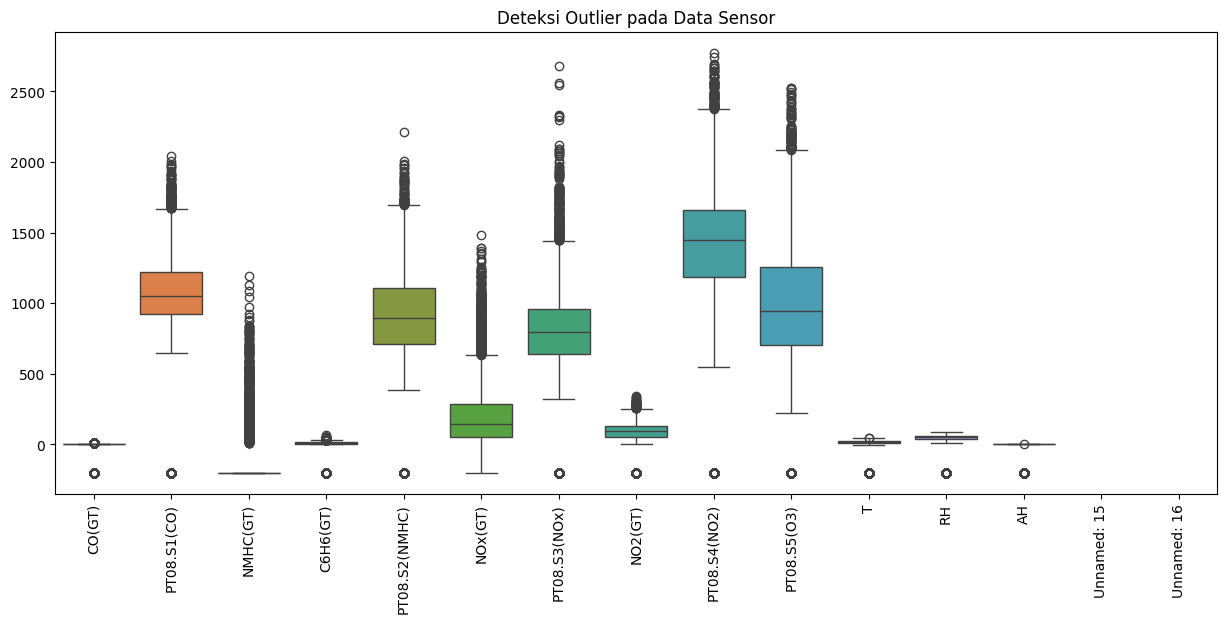

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title('Deteksi Outlier pada Data Sensor')
plt.show()

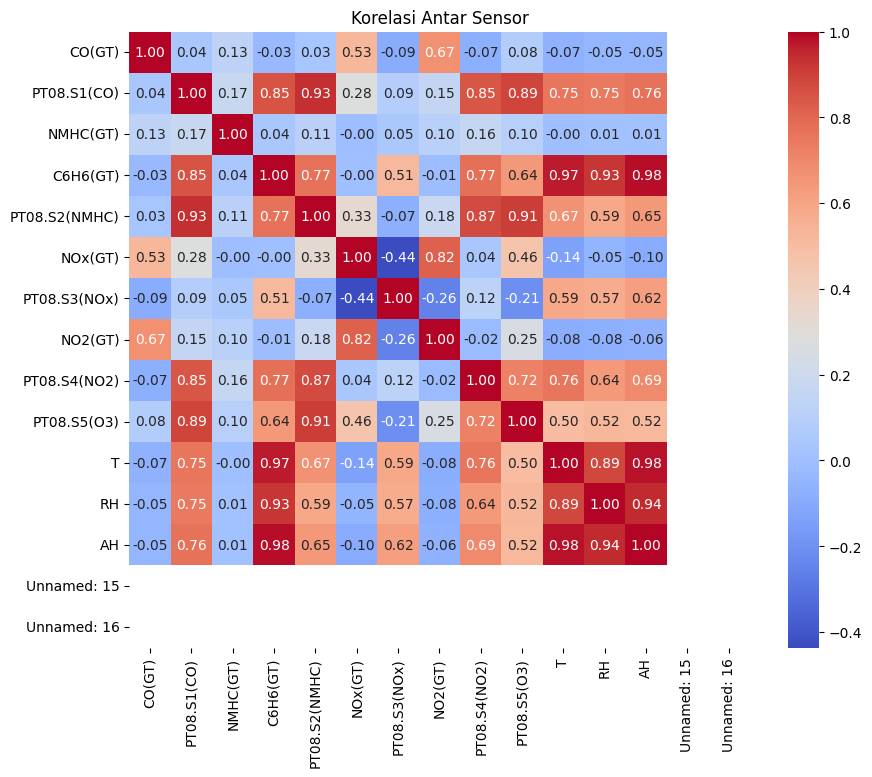

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Korelasi Antar Sensor")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Copy Dataset
df_prep = df.copy()
df_prep.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## Menghapus Kolom yang tidak relevan

In [ ]:
# Menghapus kolom unnamed
df_prep = df_prep.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

Kolom Unnamed: 15 dan Unnamed: 16 dihapus karena seluruh nilainya kosong
dan tidak memberikan informasi yang relevan.


## Menghandle Missing Values

In [ ]:
df_prep['Date'] = df_prep['Date'].ffill()
df_prep['Time'] = df_prep['Time'].ffill()

Missing value pada kolom Date dan Time ditangani menggunakan forward fill
karena data bersifat time-series dan kehilangan data terjadi secara berurutan.

In [ ]:
num_cols = df_prep.select_dtypes(include='float64').columns
df_prep[num_cols] = df_prep[num_cols].fillna(df_prep[num_cols].mean())

Missing value pada fitur numerik diisi menggunakan nilai rata-rata (mean)
untuk menjaga distribusi data dan kestabilan model.

In [ ]:
df_prep.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9471 non-null   object 
 1   Time           9471 non-null   object 
 2   CO(GT)         9471 non-null   float64
 3   PT08.S1(CO)    9471 non-null   float64
 4   NMHC(GT)       9471 non-null   float64
 5   C6H6(GT)       9471 non-null   float64
 6   PT08.S2(NMHC)  9471 non-null   float64
 7   NOx(GT)        9471 non-null   float64
 8   PT08.S3(NOx)   9471 non-null   float64
 9   NO2(GT)        9471 non-null   float64
 10  PT08.S4(NO2)   9471 non-null   float64
 11  PT08.S5(O3)    9471 non-null   float64
 12  T              9471 non-null   float64
 13  RH             9471 non-null   float64
 14  AH             9471 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


## Mengganti dan menggabungkan type kolom Date & Time

In [ ]:
df_prep['Datetime'] = pd.to_datetime(
    df_prep['Date'] + ' ' + df_prep['Time'],
    format='%d/%m/%Y %H.%M.%S',
    errors='coerce'
)


In [ ]:
df_prep = df_prep.drop(columns=['Date', 'Time'])

Kolom Date dan Time dihapus karena tidak digunakan
sebagai fitur numerik dalam pelatihan model.

In [ ]:
df_prep.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


## Normalisasi Data / Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_prep.select_dtypes(include='float64'))

df_scaled = pd.DataFrame(
    scaled_data,
    columns=df_prep.select_dtypes(include='float64').columns
)

In [ ]:
df_scaled.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.476879,0.948710,2.224665,0.243976,0.444983,-0.010228,0.815572,0.434749,0.647164,0.644995,0.089000,0.184948,0.196064
1,0.469105,0.741281,1.951161,0.183191,0.177531,-0.256450,1.184285,0.268303,0.360752,-0.006764,0.082013,0.161374,0.195231
2,0.471696,1.076827,1.778422,0.173465,0.130507,-0.147018,1.078046,0.442675,0.352138,0.217828,0.049410,0.285136,0.195868
3,0.471696,0.997516,1.720842,0.178328,0.156958,0.013222,0.928061,0.506083,0.414588,0.501872,0.028451,0.403004,0.196810
4,0.463923,0.680273,1.512116,0.112680,-0.172213,-0.147018,1.281150,0.458527,0.212161,0.297096,0.033108,0.395146,0.196865


In [ ]:
df_scaled.shape

(9471, 13)

In [ ]:
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
